### CS 439 - Introduction to Data Science
### Fall 2022

# Midsemester Project : Twitter Data Analysis

### Due Date : Monday November 23rd, 2022 by 11:59 PM 


### About this project
This is your mid-semester project. You can work on this project in two ways.

#### You can work by yourself
If you work by yourself, you have two parts optional. Part 1 and Part 7. 
    
### Project Purpose    
 
The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, Former President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. In fact, social media post are so influential, now the traditional media spends considerable amount of time discussing social media posts. Tweets from people such as Donald Trump and Elon Musk have become so consequential, they can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump or Musk meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we could pick any person (Hillary Clinton or Donald Trump or Elon Musk) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret w/o any bias.


## Set up
Let us get all the libaries initialized as necessary

In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## PART 2 - Working with Twitter Data (group and individual)
The json file in data folder contains (to be downloaded by you) some loaded tweets from @RutgersU. Run it and read the code. You can also try other json files in the data folder to try this. 

In [3]:
from pathlib import Path
import json

ds_tweets_save_path = "data/RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [4]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   

### Task 2.2
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the zip file. There should be two json files inside your data folder. One is '2017-2018.json', the other one is '2016-2017.json'. We will load the '2017-2018.json' first.

In [5]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets will be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [6]:
dest_path = "./data/2017-2018.json"
trump_tweets = load_tweets(dest_path)

If everything is working correctly correctly this should load roughly the last 3000 tweets by `realdonaldtrump`.

In [7]:
assert 2000 <= len(trump_tweets) <= 4000

If the assert statement above works, then continue on to task 2.3.

### Task 2.3

Find the number of the month of the oldest tweet.

In [8]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
oldest_month = 10 # Enter answer here and code below this
trump_tweets = pd.DataFrame(trump_tweets)

### BEGIN ANSWER
#Creation and Formating
import copy
temp = copy.deepcopy(trump_tweets)
temp["created_at"] = pd.to_datetime(temp["created_at"])

#Flipping dataframe
temp["index"] = temp.index.tolist()[:]
temp = temp.set_index(temp.index[::-1])

#Print
temp.loc[0, ["index", "created_at"] ]

### END ANSWER

index                              3213
created_at    2017-10-19 11:56:15+00:00
Name: 0, dtype: object

## PART 3  Twitter Source Analysis (group and individual)



### Task 3.1

Create a new data frame from `2016-2017.json` and merge with `trump_tweets` 

**Important:** There may/will be some overlap so be sure to __eliminate duplicate tweets__. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. 
**Hint:** the `id` of a tweet is always unique.

In [9]:
# if you do not have new tweets, then all_tweets is the same as  
# old_trump_tweets

### BEGIN ANSWER
#Getting 2016-2017.json data
dest_path = "./data/2016-2017.json"
from2016to2017_tweets = load_tweets(dest_path)
from2016to2017_tweets = pd.DataFrame(from2016to2017_tweets)

trump_tweets['id'] = trump_tweets['id'].astype(str)

### TODO: Figure if this does drop message ###
# Store merged data and drop duplicates
all_tweets = trump_tweets.merge(
    from2016to2017_tweets, 
    on=(list(from2016to2017_tweets)).remove("text"), 
    how='outer'
)
all_tweets = all_tweets.drop_duplicates(
    subset="id", keep="first", inplace=False
)
### END ANSWER
all_tweets = all_tweets.set_index('id') # id column needs to be string type
all_tweets.sort_index(inplace=True)
print("Length of df", len(all_tweets))
assert(len(all_tweets) == 9478) 

Length of df 9478


### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting dataframe should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

**Warning:** *Don't forget to check the type of index*

In [10]:
### BEGIN ANSWER ###
columns = ["created_at", "source", "text", "full_text", "retweet_count"]
df_trump = all_tweets.loc[:, columns]

df_trump.rename(
    columns = {'created_at':'time'},
    inplace = True
)

df_trump["text"] = df_trump["text"].combine_first(df_trump["full_text"])
df_trump = df_trump.drop("full_text", axis=1)
df_trump["time"] = pd.to_datetime(df_trump["time"])
### END ANSWER ###

df_trump.head()

,time,source,text,retweet_count
id,,,,
1000061992042975232,2018-05-25 17:12:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, it was my great honor to deliver the 2018 Commencement Address at the United States @NavalAcademy in Annapolis, Maryland. Congratulations!\n\nGood luck. Godspeed. And ANCHORS AWEIGH! https://t.co/aoLBK7y16a",10562
1000064605903876096,2018-05-25 17:22:37+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","On behalf of the American People, CONGRATULATIONS! We love you! https://t.co/YRlj0vRXwk",17866
1000114139136606209,2018-05-25 20:39:26+00:00,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Media Studio</a>","To the @NavalAcademy Class of 2018, I say: We know you are up to the task. We know you will make us proud. We know that glory will be yours. Because you are WINNERS, you are WARRIORS, you are FIGHTERS, you are CHAMPIONS, and YOU will lead us to VICTORY! God Bless the U.S.A.! ...",16909
1000138164923781121,2018-05-25 22:14:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Chicago Police have every right to legally protest against the mayor and an administration that just won’t let them do their job. The killings are at a record pace and tough police work, which Chicago will not allow, would bring things back to order fast...the killings must s...",24635
1000145873274359809,2018-05-25 22:45:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Funny to watch the Democrats criticize Trade Deals being negotiated by me when they don’t even know what the deals are and when for 8 years the Obama Administration did NOTHING on trade except let other countries rip off the United States. Lost almost $800 Billion/year under “O”,30848


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.


First let's examine the source field:

In [11]:
df_trump['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       'Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter Ads', 'Twitter for iPad',
       'Media Studio', 'TweetDeck', 'Periscope'], dtype=object)

## Task 3.3

Remove the HTML tags from the source field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [12]:
import re

### BEGIN ANSWER
leftSideToFilter  = 'rel="nofollow">'
df_trump["source"] = df_trump["source"].apply(lambda x: "".join(x.split(leftSideToFilter)[-1]))

rightSideToFilter = "</a>"
df_trump["source"] = df_trump["source"].apply(lambda x: "".join(x.split(rightSideToFilter)[0]))
### END ANSWER

df_trump["source"]

id
1000061992042975232    Twitter for iPhone
1000064605903876096    Twitter for iPhone
1000114139136606209          Media Studio
1000138164923781121    Twitter for iPhone
1000145873274359809    Twitter for iPhone
                              ...        
999984492197613568     Twitter for iPhone
999984495179726848     Twitter for iPhone
999984503123857408     Twitter for iPhone
999984507574018049     Twitter for iPhone
999986971660423170     Twitter for iPhone
Name: source, Length: 9478, dtype: object

### Make a plot to find out the most common device types used in accessing twitter

Sort the plot in decreasing order of the most common device type

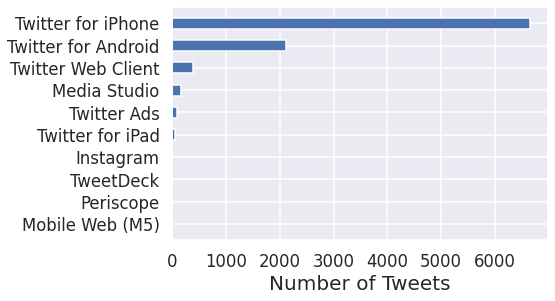

In [13]:
### BEGIN ANSWER
graph = df_trump["source"].value_counts()

# Graph
### TODO: Replace this ###
order = [
    'Twitter for iPhone', 'Twitter for Android', 'Twitter Web Client',
    'Media Studio', 'Twitter Ads', 'Twitter for iPad', 'Instagram', 
    'TweetDeck', 'Periscope', 'Mobile Web (M5)'   
]
#plt.figure(figsize =(7, 5)) 
plt.barh(order, graph.values, 0.5)
### TODO: Replace this ###

#plt.barh(graph.index, graph.values, 0.5)

plt.gca().invert_yaxis()
plt.xticks(np.arange(0,6000 + 1,1000)) 
plt.xlabel("Number of Tweets", fontsize=20)

plt.show()
### END ANSWER

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

**Note** - If your `time` column is not in datetime format, the following code will not work.

In [14]:
df_trump['time'].iloc[0:3]

id
1000061992042975232   2018-05-25 17:12:13+00:00
1000064605903876096   2018-05-25 17:22:37+00:00
1000114139136606209   2018-05-25 20:39:26+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [15]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)

df_trump.head()

,time,source,text,retweet_count,est_time
id,,,,,
1000061992042975232,2018-05-25 17:12:13+00:00,Twitter for iPhone,"Today, it was my great honor to deliver the 2018 Commencement Address at the United States @NavalAcademy in Annapolis, Maryland. Congratulations!\n\nGood luck. Godspeed. And ANCHORS AWEIGH! https://t.co/aoLBK7y16a",10562,2018-05-25 12:12:13-05:00
1000064605903876096,2018-05-25 17:22:37+00:00,Twitter for iPhone,"On behalf of the American People, CONGRATULATIONS! We love you! https://t.co/YRlj0vRXwk",17866,2018-05-25 12:22:37-05:00
1000114139136606209,2018-05-25 20:39:26+00:00,Media Studio,"To the @NavalAcademy Class of 2018, I say: We know you are up to the task. We know you will make us proud. We know that glory will be yours. Because you are WINNERS, you are WARRIORS, you are FIGHTERS, you are CHAMPIONS, and YOU will lead us to VICTORY! God Bless the U.S.A.! ...",16909,2018-05-25 15:39:26-05:00
1000138164923781121,2018-05-25 22:14:54+00:00,Twitter for iPhone,"Chicago Police have every right to legally protest against the mayor and an administration that just won’t let them do their job. The killings are at a record pace and tough police work, which Chicago will not allow, would bring things back to order fast...the killings must s...",24635,2018-05-25 17:14:54-05:00
1000145873274359809,2018-05-25 22:45:32+00:00,Twitter for iPhone,Funny to watch the Democrats criticize Trade Deals being negotiated by me when they don’t even know what the deals are and when for 8 years the Obama Administration did NOTHING on trade except let other countries rip off the United States. Lost almost $800 Billion/year under “O”,30848,2018-05-25 17:45:32-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [16]:
### BEGIN ANSWER
#time
xs = []
for x in df_trump["est_time"]:
    z = 0
    if x.time().hour == 0:
        z = 24
    else:
        z = x.time().hour
    
    z += (x.time().minute / 60)
    z += (x.time().second) / (np.square(60))
    xs.append(z)

df_trump["hour"] = xs
### END ANSWER

In [17]:
assert np.isclose(df_trump.loc["690171032150237184"]['hour'], 8.93639)

Use the `roundhour` column and plot the number of tweets at every hour of the day.
Order the plot using the hour of the day (1 to 24). Use seaborn `countplot`

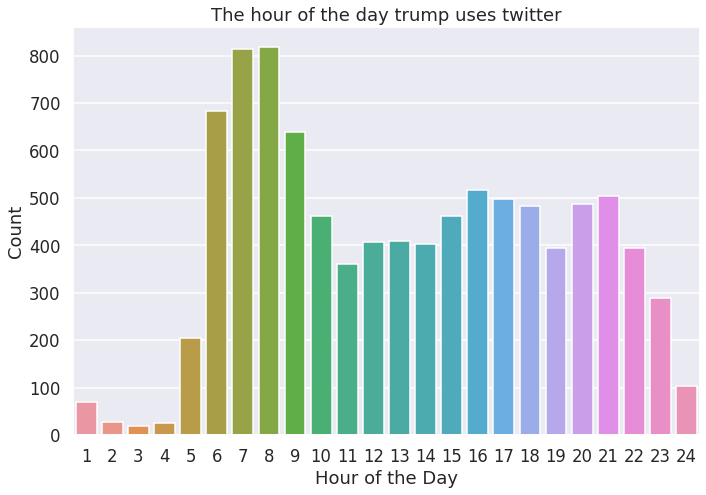

In [18]:
### BEGIN ANSWER ###
## Adding back roundhour ##
## For some reason roundhour was lost some time after the deletion 
## of the code for part 1. Which is weird since:
##   1) Part 1 is a self-contained except for part 
##   2) The code was changed to "Markdown", making it unexceutable 
##      before it was deleted. 
## So I'm for remaking it here
df_trump["roundhour"] = df_trump["hour"].apply(lambda x: round(x))
xs = []
for x in df_trump["roundhour"]:
    if x == 25:
        xs.append(1)
    else:
        xs.append(x)

df_trump["roundhour"] = xs

## Graph ##
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x=df_trump["roundhour"], ax=ax)
ax.set(
    xlabel = "Hour of the Day", 
    ylabel = "Count", 
    title = "The hour of the day trump uses twitter"
)
plt.show()
### END ANSWER ###

Now, use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following.
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 400px;"/>


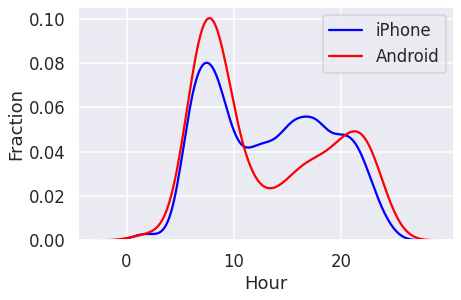

In [19]:
### BEGIN ANSWER ###
## Hide Errors (Optional) ##
import warnings
warnings.simplefilter('ignore', category=UserWarning)

## Prepare graph ##
graphIphone = df_trump.loc[df_trump["source"] == "Twitter for iPhone"]
graphIphone = graphIphone[["hour"]]

graphAndroid = df_trump.loc[df_trump["source"] == "Twitter for Android"]
graphAndroid = graphAndroid[["hour"]]


## Graphing ##
ax = sns.distplot(
        graphIphone, hist=False, label="iPhone", color="blue"
     )
ax = sns.distplot(
        graphAndroid, hist=False, label="Android", color="red"
     )

ax.set_xticks([0, 10, 20])
ax.set_yticks([0.00, 0.02, 0.04, 0.06, 0.08, 0.10])
ax.set(
    xlabel = "Hour",
    ylabel = "Fraction"
)
plt.legend(loc='upper right')

plt.show()
### END ANSWER ###

### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

\\
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 600px;"/>


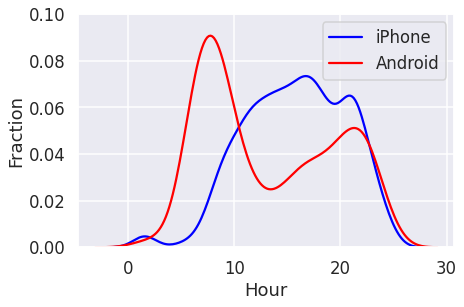

In [20]:
### BEGIN ANSWER ###
## Hide Errors (Optional) ##
import warnings
warnings.simplefilter('ignore', category=UserWarning)

## Prepare graph ##
import copy
temp = copy.deepcopy(df_trump)
temp["year"] = temp["est_time"].apply(lambda x: x.date().year)
temp = temp.loc[(temp["year"] == 2016)]

graphIphone = temp.loc[df_trump["source"] == "Twitter for iPhone"]
graphIphone = graphIphone[["hour"]]

graphAndroid = temp.loc[df_trump["source"] == "Twitter for Android"]
graphAndroid = graphAndroid[["hour"]]


## Graphing ##
ax = sns.distplot(
        graphIphone, hist=False, label="iPhone", color="blue"
     )
ax = sns.distplot(
        graphAndroid, hist=False, label="Android", color="red"
     )

ax.set_xticks([0, 10, 20, 30])
ax.set_yticks([0.00, 0.02, 0.04, 0.06, 0.08, 0.10])
ax.set(
    xlabel = "Hour",
    ylabel = "Fraction"
)
plt.legend(loc='upper right')

plt.show()
### END ANSWER ###

### Task 3.6
Edit this cell to answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)

The entire day, but most prevelant before 10am

* What time of the day the Android tweets were made by paid staff?

If the increase of tweets from the iphone after 10am are an indication of his staff tweeting for him, then it would follow that his android usage follows as well.

Note that these are speculations based on what you observe in the data set.

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [21]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

![title](images/source_years.png)

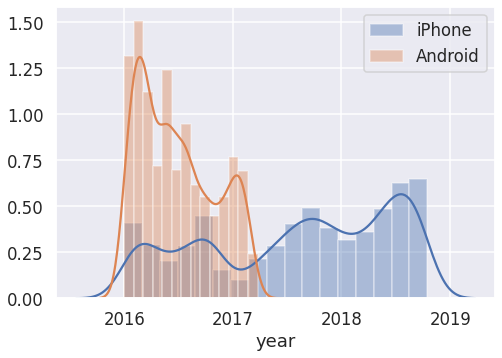

In [22]:
### BEGIN ANSWER
"""
## Hide Errors (Optional) ##
import warnings
warnings.simplefilter('ignore', category=UserWarning)
"""

## Dataframe prep ##
graphIphone = df_trump.loc[df_trump["source"] == "Twitter for iPhone"]
graphIphone = graphIphone[["year"]]

graphAndroid = df_trump.loc[df_trump["source"] == "Twitter for Android"]
graphAndroid = graphAndroid[["year"]]


## Graph Preperation ##
plt.figure(
    figsize=(7, 5), 
#    facecolor='whitesmoke'
) 

## Graphing ##
ax = sns.distplot(graphIphone, label="iPhone", kde = True)
ax = sns.distplot(graphAndroid, label="Android", kde = True)

ax.set_xticks([2016, 2017, 2018, 2019])
ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50])
ax.set(
    xlabel = "year",
    ylabel = ""
)

plt.legend(loc='upper right')
plt.show()
### END ANSWER

## PART 4 - Sentiment Analysis  (group and individual)

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [23]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [24]:
### BEGIN ANSWER
data = pd.read_csv('data/vader_lexicon.txt', sep='\t', header=None)
#data = pd.read_csv("data/vader_lexicon.txt",delimiter='\t',header=None)
df_sent = pd.DataFrame()
df_sent['token']=data[0]
df_sent['sentiment']=data[1]
df_sent['std']=data[2]
df_sent['human_eval']=data[3]
#df_sent
### END ANSWER

### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [25]:
### BEGIN ANSWER 
df_trump["text"] = df_trump["text"].apply(lambda entry: entry.lower())
### END ANSWER

### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

In [26]:
# Save your regex in punct_re
punct_re = r'[^\w\s\\n]'

### BEGIN ANSWER
#Required if "\n" is to be removed
#punct_re = r'[^\w\s\\n](\n*)'

no_punc = []
for tweet in df_trump["text"]:
    no_punc.append(re.sub(punct_re, ' ', tweet))

df_trump["no_punc"] = no_punc
### END ANSWER

In [27]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None

"""
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'
"""

assert df_trump['no_punc'].loc["800329364986626048"] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc["884740553040175104"] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'

### Task 4.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

You can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [28]:
#tidy_format = ...
### BEGIN ANSWER

# To hide an error message #
# [Caused by pd.explode()] #
pd.options.mode.chained_assignment = None  # default='warn'

# Avoid df_trump from being modified on accident #
import copy 
tidy_format = copy.deepcopy(df_trump)

# Answer #
tidy_format["word"] = tidy_format["no_punc"].apply(
                          lambda x: x.split()
                      )
tidy_format["num"] = tidy_format["word"].apply(
                          lambda x: list(range(len(x)))
                     )
tidy_format = tidy_format.explode( ["num", "word"] )
tidy_format = tidy_format[["num", "word"]]

# Printing #
print(
    tidy_format.rename(columns={"num":"level_1", "word":"0"})
               .reset_index()
)
### END ANSWER

                         id level_1       0
0       1000061992042975232       0   today
1       1000061992042975232       1      it
2       1000061992042975232       2     was
3       1000061992042975232       3      my
4       1000061992042975232       4   great
...                     ...     ...     ...
224996   999986971660423170      30    time
224997   999986971660423170      31     and
224998   999986971660423170      32  talent
224999   999986971660423170      33    will
225000   999986971660423170      34    tell

[225001 rows x 3 columns]


In [29]:
"""
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'
"""

assert tidy_format.loc["894661651760377856"].shape == (27, 2)
assert ' '.join(list(tidy_format.loc["894661651760377856"]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `df_sent` tables and group the final answer.


In [30]:
#df_trump['polarity'] = ...
### BEGIN ANSWER ###
#Preparing df_sent_merge#
import copy
df_sent_merge = copy.deepcopy(df_sent)
df_sent_merge.rename(
    columns = {'token':'word'},
    inplace = True
)
df_sent_merge = df_sent_merge[["word", "sentiment"]]

# getting df_sent_merge duplicate averages #
duplicate_series = df_sent_merge["word"].isin(
                       df_sent_merge["word"][df_sent_merge["word"].duplicated()]
                   )
duplicates = df_sent_merge[duplicate_series].sort_values("word")[["word", "sentiment"]]
#duplicates.groupby("word").apply(lambda x: print(x))
duplicateAverages = duplicates.groupby("word").apply(
                        lambda x: x.sum() / len(x)
                    )
duplicateAverages = duplicateAverages.reset_index()

# merge values back #
###TODO: Replace this for loop with .map function solution below###
for word, sentiment in duplicateAverages.values: 
    df_sent_merge.loc[df_sent_merge['word'] == word, 'sentiment'] = sentiment
df_sent_merge = df_sent_merge.drop_duplicates()

# merge the values into tidy_format #
tidy_format = tidy_format.reset_index().merge(
    df_sent_merge[["word", "sentiment"]],
    on = "word",
    how='left'
).set_index("id")

# Replacing nan values in polarity with 0 #
tidy_format_nan_series = tidy_format["sentiment"].apply(
                                lambda x: np.isnan(x)
                         )
tidy_format.loc[tidy_format_nan_series == True, "sentiment"] = 0

#Calculate the df_trump polarity#
df_trump["polarity"] = df_trump.index.map(
                            lambda x:
                            round(
                                tidy_format.loc[x]["sentiment"].sum(), 1
                            )
                       )

### END ANSWER
df_trump

,time,source,text,retweet_count,est_time,hour,roundhour,year,no_punc,polarity
id,,,,,,,,,,
1000061992042975232,2018-05-25 17:12:13+00:00,Twitter for iPhone,"today, it was my great honor to deliver the 2018 commencement address at the united states @navalacademy in annapolis, maryland. congratulations!\n\ngood luck. godspeed. and anchors aweigh! https://t.co/aolbk7y16a",10562,2018-05-25 12:12:13-05:00,12.203611,12,2018.394521,today it was my great honor to deliver the 2018 commencement address at the united states navalacademy in annapolis maryland congratulations \n\ngood luck godspeed and anchors aweigh https t co aolbk7y16a,13.9
1000064605903876096,2018-05-25 17:22:37+00:00,Twitter for iPhone,"on behalf of the american people, congratulations! we love you! https://t.co/yrlj0vrxwk",17866,2018-05-25 12:22:37-05:00,12.376944,12,2018.394521,on behalf of the american people congratulations we love you https t co yrlj0vrxwk,6.1
1000114139136606209,2018-05-25 20:39:26+00:00,Media Studio,"to the @navalacademy class of 2018, i say: we know you are up to the task. we know you will make us proud. we know that glory will be yours. because you are winners, you are warriors, you are fighters, you are champions, and you will lead us to victory! god bless the u.s.a.! ...",16909,2018-05-25 15:39:26-05:00,15.657222,16,2018.394521,to the navalacademy class of 2018 i say we know you are up to the task we know you will make us proud we know that glory will be yours because you are winners you are warriors you are fighters you are champions and you will lead us to victory god bless the u s a ...,11.8
1000138164923781121,2018-05-25 22:14:54+00:00,Twitter for iPhone,"chicago police have every right to legally protest against the mayor and an administration that just won’t let them do their job. the killings are at a record pace and tough police work, which chicago will not allow, would bring things back to order fast...the killings must s...",24635,2018-05-25 17:14:54-05:00,17.248333,17,2018.394521,chicago police have every right to legally protest against the mayor and an administration that just won t let them do their job the killings are at a record pace and tough police work which chicago will not allow would bring things back to order fast the killings must s...,-5.7
1000145873274359809,2018-05-25 22:45:32+00:00,Twitter for iPhone,funny to watch the democrats criticize trade deals being negotiated by me when they don’t even know what the deals are and when for 8 years the obama administration did nothing on trade except let other countries rip off the united states. lost almost $800 billion/year under “o”,30848,2018-05-25 17:45:32-05:00,17.758889,18,2018.394521,funny to watch the democrats criticize trade deals being negotiated by me when they don t even know what the deals are and when for 8 years the obama administration did nothing on trade except let other countries rip off the united states lost almost 800 billion year under o,0.8
...,...,...,...,...,...,...,...,...,...,...
999984492197613568,2018-05-25 12:04:16+00:00,Twitter for iPhone,"the democrats are now alluding to the the concept that having an informant placed in an opposing party’s campaign is different than having a spy, as illegal as that may be. but what about an “informant” who is paid a fortune and who “sets up” way earlier than the russian hoax?",17785,2018-05-25 07:04:16-05:00,7.071111,7,2018.394521,the democrats are now alluding to the the concept that having an informant placed in an opposing party s campaign is different than having a spy as illegal as that may be but what about an informant who is paid a fortune and who sets up way earlier than the russian hoax,-2.0
999984495179726848,2018-05-25 12:04:17+00:00,Twitter for iPhone,"can anyone even imagine having spies placed in a competing campaign, by the people and party in absolute power, for the sole purpose of political advantage and gain? and to think that the party in question, even with the expenditure of far mo

In [31]:
assert np.allclose(df_trump.loc["744701872456536064", 'polarity'], 8.4)
assert np.allclose(df_trump.loc["745304731346702336", 'polarity'], 2.5)
assert np.allclose(df_trump.loc["744519497764184064", 'polarity'], 1.7)
assert np.allclose(df_trump.loc["894661651760377856", 'polarity'], 0.2)
assert np.allclose(df_trump.loc["894620077634592769", 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
assert np.allclose(df_trump.loc["744355251365511169", 'polarity'], 0.0)

### Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [32]:
print('Most negative tweets:')

### BEGIN ANSWER
print()
arr = df_trump.sort_values("polarity")["text"][0:5].values
for tweet in arr:
    print("   " + tweet + "\n")
### END ANSWER

Most negative tweets:

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak and.....

   this is an illegally brought rigged witch hunt run by people who are totally corrupt and/or conflicted. it was started and paid 

In [33]:
print('Most positive tweets:')

### BEGIN ANSWER
print()
arr = df_trump.sort_values("polarity")["text"][::-1][0:5].values
for tweet in arr:
    print("   " + tweet + "\n")
### END ANSWER

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new poll says trump, at over 90%, is the most popular republican in history of the party. wow!

   it was my great honor to deliver a message at the marine corps air station miramar to our great u.s. military, straight from the heart of the american people: we support you, we thank you

### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

![title](images/nyt_vs_fox.png)

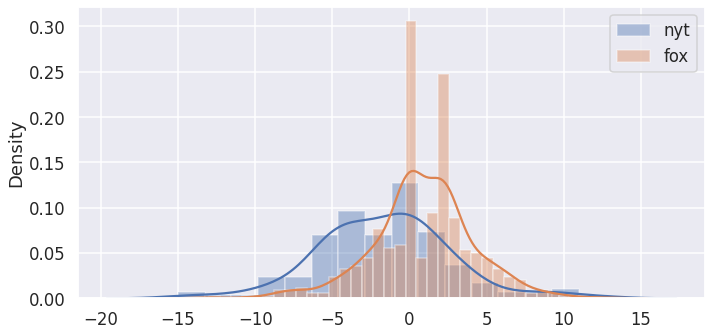

In [34]:
### BEGIN ANSWER
## Data to Graph ##
graph_nyt = df_trump.loc[df_trump["text"].str.contains("nyt")][["polarity"]]
graph_fox = df_trump.loc[df_trump["text"].str.contains("fox")][["polarity"]]

## Graph Preperation ##
plt.figure(figsize=(10, 5)) 

## Graphing ##
ax = sns.distplot(graph_nyt, label="nyt", kde = True)
ax = sns.distplot(graph_fox, label="fox", kde = True)

ax.set_xticks(list(range(-20,20,5)))
ax.set_yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30])

ax.set(
    xlabel = "",
)

plt.legend(loc='upper right')
plt.show()
### END ANSWER

##### Comment on what you observe:

#### BEGIN ANSWER
Trump not only sings the highest praises for fox, but he also sings these praises much more frequently. 
#### END ANSWER

## PART 5 - Principal Component Analysis (PCA) and Twitter  (group and individual)
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like Make America Great Again. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created

Start with the `tidy_format` dataframe

In [35]:
## code to plot the first 10 rows of the matrix
import nltk
import nltk.corpus
nltk.download('stopwords')
nltk.download('wordnet')

#create a dataframe called tmp to store all words appear in the tweets
tmp = tidy_format.drop('num',axis=1)

#remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
stopwords.extend(['rt','t','co','https','realdonaldtrump','amp',"u",'hillary','trump2016','trump','clinton','http','ha','wa'])
tmp = tmp[~tmp['word'].isin(stopwords)]

#deal with plurals
from nltk.stem.wordnet import WordNetLemmatizer as lem
tmp['word'] = tmp['word'].apply(lambda x: lem().lemmatize(x))

# Remove numbers
tmp = tmp[~(tmp['word'].str.isnumeric())]

#Remove words with only 1 or 2 length
tmp = tmp[(tmp['word'].str.len() > 2)]

#get top50 words
tmp = tmp.reset_index()
top50 = tmp['word'].value_counts(ascending=False).nlargest(50).to_frame()

tmp2 = tmp[tmp['word'].isin(top50.reset_index()['index'])]

idlist = tmp2['id'].unique()
idlist.sort()
idlist = idlist[:5000]

#create the tf-matrix
matrix = np.zeros((5000,50))
top50 = top50.reset_index()
for a in range(5000):
    for b in range(50):
        if (top50['index'][b]) in df_trump['no_punc'].loc[idlist[a]]:
            matrix[a][b] += 1

## Print ##
print(matrix[:10])
top50

[nltk_data] Downloading package stopwords to /home/yocif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yocif/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

,index,word
0,great,1742
1,thank,1014
2,people,821
3,america,638
4,president,595
5,country,577
6,job,573
7,big,538
8,time,515
9,make,500


### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [36]:
### BEGIN ANSWER
#mu = X.mean(axis=0)
#X_ = X - mu

matrix_mean = matrix.mean(axis=0)
matrix_ = matrix - matrix_mean

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
#pca = PCA(n_components=50)
pca.fit(matrix)
print(pca.components_)
print(pca.explained_variance_)
component50 = pca.components_
### END ANSWER

[[ 5.86202159e-01  1.90323539e-01 -3.13832348e-02 ...  2.72474588e-02
  -2.34567806e-02  1.00084346e-02]
 [ 1.67419684e-01 -4.62442070e-02  2.35474038e-02 ... -2.25009794e-02
  -1.93098550e-02  7.01166980e-02]
 [ 3.27921786e-01 -7.65935661e-01  1.51732490e-01 ... -4.00623419e-02
   2.19839319e-02 -3.48735538e-02]
 ...
 [ 6.46004476e-03 -6.81464741e-03 -3.11627241e-03 ... -2.47231379e-02
   5.92864129e-03 -4.11446462e-03]
 [-3.59378314e-03 -6.20139865e-03  1.66215292e-03 ...  1.30722320e-02
  -9.02984318e-03 -8.82346873e-04]
 [-6.77223679e-05 -1.12766459e-04  2.93629257e-04 ... -1.03159269e-04
   1.94466948e-04  2.61386164e-04]]
[3.35674840e-01 1.57634708e-01 1.46130119e-01 1.43238863e-01
 1.16646997e-01 1.08459440e-01 9.96582990e-02 8.95208225e-02
 7.57638856e-02 7.33198725e-02 6.99958819e-02 6.88890497e-02
 6.64182396e-02 6.03770696e-02 5.68009059e-02 5.59451840e-02
 5.41527789e-02 5.07140158e-02 5.04095380e-02 4.68963397e-02
 4.59449857e-02 4.48303439e-02 4.38334519e-02 4.17203100e-0

### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. 

![title](images/pca.png)



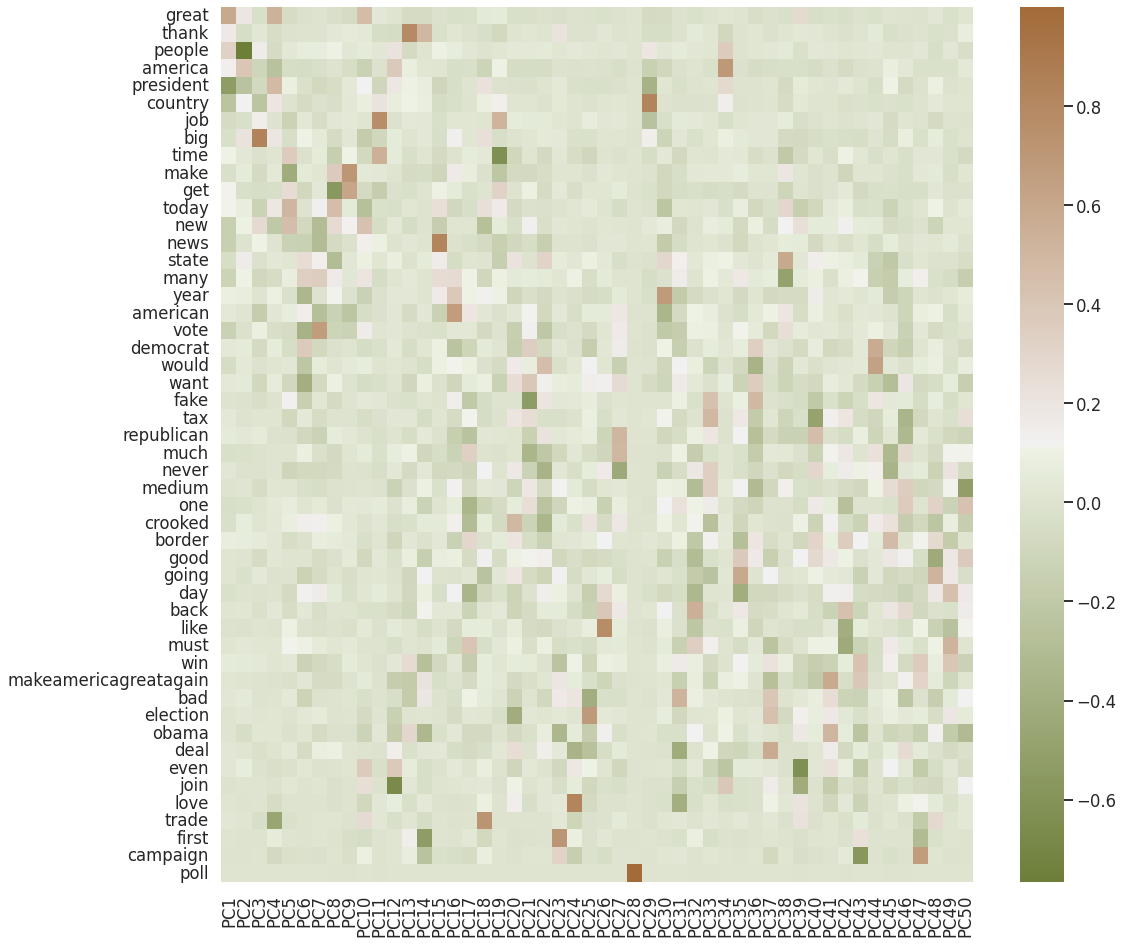

In [37]:
cmap = sns.diverging_palette(100, 400,as_cmap=True)
### BEGIN ANSWER
##Label / x-axis ticks##
pcalabel = []
for i in range(1,len(top50) + 1):
    pcalabel.append('PC'+str(i))

##Graphing##
plt.figure(figsize=(15,15))
sns.heatmap(
    component50, #component20,
    cmap = cmap, 
    xticklabels = pcalabel,
    #yticklabels = top50_words, 
    yticklabels = top50["index"]
)
plt.show()
### END ANSWER

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

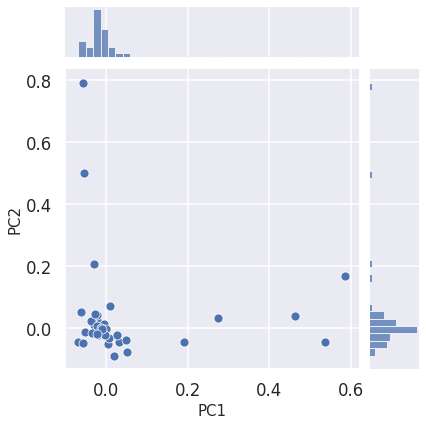

In [38]:
### BEGIN ANSWER
## Data ##
PC1 = (component50[0])
PC2 = (component50[1])

## Graph ##
#plt.figure(figsize=(1, 5))

#ax = sns.scatterplot(x = pca1, y = pca2)
ax = sns.jointplot (x = PC1, y = PC2)
ax.set_axis_labels('PC1', 'PC2', fontsize=15)

plt.show()
### END ANSWER

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~5-7 pandas commands and get everything done on one line.

In [39]:
#top_20 = ...
### BEGIN ANSWER
## create a dataframe called tmp to     ##
## store all words appear in the tweets ##
top_20 = tidy_format.groupby("word") \
                    .size()          \
                    .to_frame()      \


## Removing: words in less than 24 tweets ##
top_20 = top_20.loc[top_20[0] > 24]                    \
               .reset_index()                          \
               
## Removing stopwords, and numbers  ##
top_20 = top_20.loc[~top_20["word"].isin(stopwords)]   \
               .loc[~(top_20["word"].str.isnumeric())] \

## Changing/Removing plurals ##
top_20["word"] = top_20['word'].apply(lambda x: lem().lemmatize(x))

## Filling retweet_count ##
top_20["ret"] = top_20["word"].apply(
                    lambda x:
                    df_trump.loc[df_trump["retweet_count"] > 24] \
                            .loc[df_trump["text"].map(
                                lambda y: 
                                re.search(r'\W' + x + r'\W', y) != None
                            )] \
                            ["retweet_count"] \
                            .mean() \
                )

## Conversation ##
top_20 = top_20.dropna() \
               .sort_values("ret")[::-1][:20] \
               .set_index("word")[["ret"]] \

## Printing ##
top_20.rename(columns={"ret":"retweet_count"})
### END ANSWER

,retweet_count
word,
jong,40874.071429
un,33036.131579
kim,32771.820513
maybe,30073.458333
kavanaugh,28651.962963
try,28256.551724
old,27613.151515
mccabe,27119.560000
flag,26803.310345


### Task 6.2
Plot a bar chart of your results:

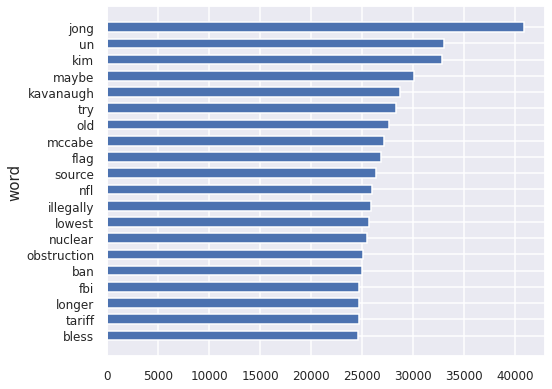

In [40]:
### BEGIN ANSWER
plt.figure(figsize = (7, 6)) 
plt.barh(top_20.index, top_20["ret"].values, 0.6)

plt.gca().invert_yaxis()

plt.ylabel("word", fontsize=15)

plt.xticks(np.arange(0,40000 + 1,5000), fontsize=12) 
plt.yticks(top_20.index, fontsize=12) 

plt.show()
### END ANSWER

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as yourSection_yourNetID_midsemester.jpynb<br>
<b> Group Projects:</b> Each person in the group must submit a copy with both names listed and your partners contribution answered. If you are doing a group project, you must inform your TA prior to 11/10/22 that you intend to work as a group and submit your name and your partner name via the form. We will <b>not accept group work</b> if your TA has not been notified.<br>
<b> Submit To: </b> Codebench (remove all output. Do not submit data files<br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Created by Andy Guna @2019-2022 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez